In [ ]:
# !pip install yfinance
# !pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [ ]:
from tvDatafeed import TvDatafeed, Interval

username = 'YourTradingViewUsername'
password = 'YourTradingViewPassword'

tv = TvDatafeed(username, password)

ERROR:tvDatafeed.main:error while signin


In [ ]:
nifty_data = tv.get_hist(symbol='NIFTY',exchange='NSE',interval=Interval.in_5_minute,n_bars=5000)
nifty_data

,symbol,open,high,low,close,volume
datetime,,,,,,
2024-10-11 06:50:00,NSE:NIFTY,24939.70,24948.20,24936.90,24938.85,1379566.0
2024-10-11 06:55:00,NSE:NIFTY,24939.20,24964.00,24938.35,24961.75,1391609.0
2024-10-11 07:00:00,NSE:NIFTY,24961.35,24968.35,24950.75,24968.05,1545638.0
2024-10-11 07:05:00,NSE:NIFTY,24967.80,24969.10,24954.75,24960.40,1392134.0
2024-10-11 07:10:00,NSE:NIFTY,24960.90,24962.90,24947.45,24948.75,7676388.0
...,...,...,...,...,...,...
2025-01-17 09:35:00,NSE:NIFTY,23207.10,23207.10,23191.90,23200.75,5728585.0
2025-01-17 09:40:00,NSE:NIFTY,23201.35,23204.40,23196.00,23196.65,6510363.0
2025-01-17 09:45:00,NSE:NIFTY,23197.80,23210.55,23195.70,23206.45,8693419.0


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

nifty_ticker = "^NSEI"
nifty_50 = yf.Ticker(nifty_ticker)
st_date = datetime(2024,11,19)
end_date = datetime(2025,1,15)
data = yf.download(nifty_ticker, start=st_date, end=end_date, interval='5m')
# print(data)
# nifty_data = nifty_50.history(period="1d", interval="1m")

# nifty_close = nifty_data['Close']
# nifty_close.index = pd.to_datetime(nifty_close.index)
# nifty_close_resampled = nifty_close.resample('5min').mean().interpolate(method='linear')
# nifty_close_resampled
data_close = data['Close']
data_close.index = pd.to_datetime(data_close.index)
data_close_resampled = data_close.resample('5min').mean().interpolate(method='linear')
data_close_resampled
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Datetime,,,,,
2024-11-19 03:45:00+00:00,23590.050781,23601.300781,23523.650391,23538.199219,0
2024-11-19 03:50:00+00:00,23639.349609,23639.349609,23581.150391,23592.099609,0
2024-11-19 03:55:00+00:00,23663.849609,23665.349609,23620.300781,23640.150391,0
2024-11-19 04:00:00+00:00,23671.550781,23676.949219,23641.500000,23664.099609,0
2024-11-19 04:05:00+00:00,23689.750000,23694.400391,23667.300781,23672.000000,0
...,...,...,...,...,...
2025-01-14 09:35:00+00:00,23176.300781,23176.449219,23152.900391,23158.599609,0
2025-01-14 09:40:00+00:00,23173.250000,23176.650391,23164.050781,23175.750000,0


In [ ]:
# # values = data['value'].values.reshape(-1, 1)
# # values = data_close_resampled.values.reshape(-1, 1)
# values = data['Close'].values.reshape(-1, 1)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(values)
# data_scaled.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# features = ['Open', 'High', 'Low']
features = ['open', 'high', 'low', 'close']
# target = 'Close'
target = 'close'

# data_df = data[features + [target]].values
# data_df = nifty_data[features + [target]].values
data_df = nifty_data[features].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_df)
data_scaled

array([[0.87942915, 0.87653252, 0.8867017 , 0.87875604],
       [0.87919557, 0.88392606, 0.8873821 , 0.88944923],
       [0.8895429 , 0.88596163, 0.89320069, 0.89239103],
       ...,
       [0.06570434, 0.06340664, 0.06965886, 0.06980925],
       [0.0698386 , 0.06195601, 0.07008118, 0.06857183],
       [0.0687408 , 0.06197941, 0.06923654, 0.06824496]])

In [ ]:
# def create_sequences(data, seq_length):
#     sequences, labels = [], []
#     for i in range(len(data) - seq_length):
#         seq = data[i:i + seq_length]
#         label = data[i + seq_length]
#         sequences.append(seq)
#         labels.append(label)
#     return np.array(sequences), np.array(labels)

# seq_length = 5
# X, y = create_sequences(data_scaled, seq_length)

# X = X.reshape(X.shape[0], seq_length, 1)


In [ ]:
# import numpy as np

# def create_multivariate_sequences(data, seq_length):
#     sequences, labels = [], []
#     for i in range(len(data) - seq_length):
#         seq = data[i:i + seq_length]  # All features for the given sequence
#         label = data[i + seq_length, -1]  # Target value only
#         sequences.append(seq)
#         labels.append(label)
#     return np.array(sequences), np.array(labels)

# seq_length = 12  # Adjust based on your data's patterns
# X, y = create_multivariate_sequences(data_scaled, seq_length)

# X = X.reshape(X.shape[0], seq_length, len(features) + 1)  # Features + target


In [ ]:

def create_multivariate_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

seq_length = 12
X, y = create_multivariate_sequences(data_scaled, seq_length)

# X = X.reshape(X.shape[0], seq_length, len(features))  # Features + target
# y = y.reshape(y.shape[0], len(features))


In [ ]:
# train_size = int(0.8 * len(X))
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# model = Sequential([
#     LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
#     LSTM(50, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')
# model.summary()


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# model = Sequential([
#     LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_length, len(features) + 1)),
#     LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, len(features) + 1)),
#     LSTM(32, activation='relu'),
#     # Dense(1)
#     Dense(4)
# ])

# model.compile(optimizer='adam', loss='mse')
# model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 12, 128)             │          68,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 12, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,564 (510.02 KB)

 Trainable params: 130,564 (510.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_length, len(features))),
    LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, len(features))),
    LSTM(32, activation='relu'),
    # Dense(1)
    Dense(4)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 12, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 12, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_32 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,052 (508.02 KB)

 Trainable params: 130,052 (508.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')


history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[checkpoint, early_stop])


Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 0.1559 - val_loss: 0.0012
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0015 - val_loss: 9.1020e-04
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 8.4742e-04 - val_loss: 0.0010
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 7.8202e-04 - val_loss: 8.3701e-04
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 7.0480e-04 - val_loss: 5.7355e-04
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 6.0597e-04 - val_loss: 4.7079e-04
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 6.0194e-04 - val_loss: 4.8392e-04
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 5.6190e-04 - val_loss: 4.3337e-04
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 6.1346e-04 - val_loss: 4.1985e-04
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 4.5991e-04 - val_loss: 5.3696e-04
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step

In [ ]:
# # Save the model in TensorFlow SavedModel format

# model.save('lstm_model_future_all.keras')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('lstm_model.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

tnifty_ticker = "^NSEI"
tnifty_50 = yf.Ticker(tnifty_ticker)
tst_date = datetime(2025,1,1)
tend_date = datetime(2025,1,3)
test_data = yf.download(tnifty_ticker, start=tst_date, end=tend_date, interval='5m')
# print(test_data)


features = ['Open', 'High', 'Low' , 'Close']
target = 'Close'

# tdata_df = test_data[features + [target]].values
tdata_df = test_data[features].values
# print(tdata_df)
scaler = MinMaxScaler()
tdata_scaled = scaler.fit_transform(tdata_df)
# print(tdata_scaled)
seq_length = 12
Xt, yt = create_multivariate_sequences(tdata_scaled, seq_length)
# print(yt)
# Xt = Xt.reshape(Xt.shape[0], seq_length, len(features))  # Features + target


test_pred = model.predict(Xt)
# test_pred = loaded_model.predict(Xt)
# print(test_pred)
# test_pred_s = scaler.inverse_transform(np.c_[np.zeros((len(test_pred), len(features))), test_pred])[:, -1]
test_pred_s = scaler.inverse_transform(test_pred)
# print(test_pred_s)
# test_org = scaler.inverse_transform(np.c_[np.zeros((len(yt), len(features))), yt])[:, -1]
test_org = scaler.inverse_transform(yt)


[*********************100%***********************]  1 of 1 completed

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
# test_loss = model.evaluate(X_test, y_test)
# print("Test Loss:", test_loss)

# predictions = model.predict(X_test)
# predictions_rescaled = scaler.inverse_transform(predictions)
# y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
test_loss = model.evaluate(X_test, y_test)
# test_loss = loaded_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
predictions = model.predict(X_test)
# predictions = loaded_model.predict(X_test)

# y_test_rescaled = scaler.inverse_transform(np.c_[np.zeros((len(y_test), len(features))), y_test])[:, -1]
y_test_rescaled = scaler.inverse_transform(y_test)
# predictions_rescaled = scaler.inverse_transform(np.c_[np.zeros((len(predictions), len(features))), predictions])[:, -1]
predictions_rescaled = scaler.inverse_transform(predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2280e-05
Test Loss: 6.4016756368801e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(y_test_rescaled, label='Actual')
# plt.plot(predictions_rescaled, label='Predicted')
# plt.legend()
# plt.show()


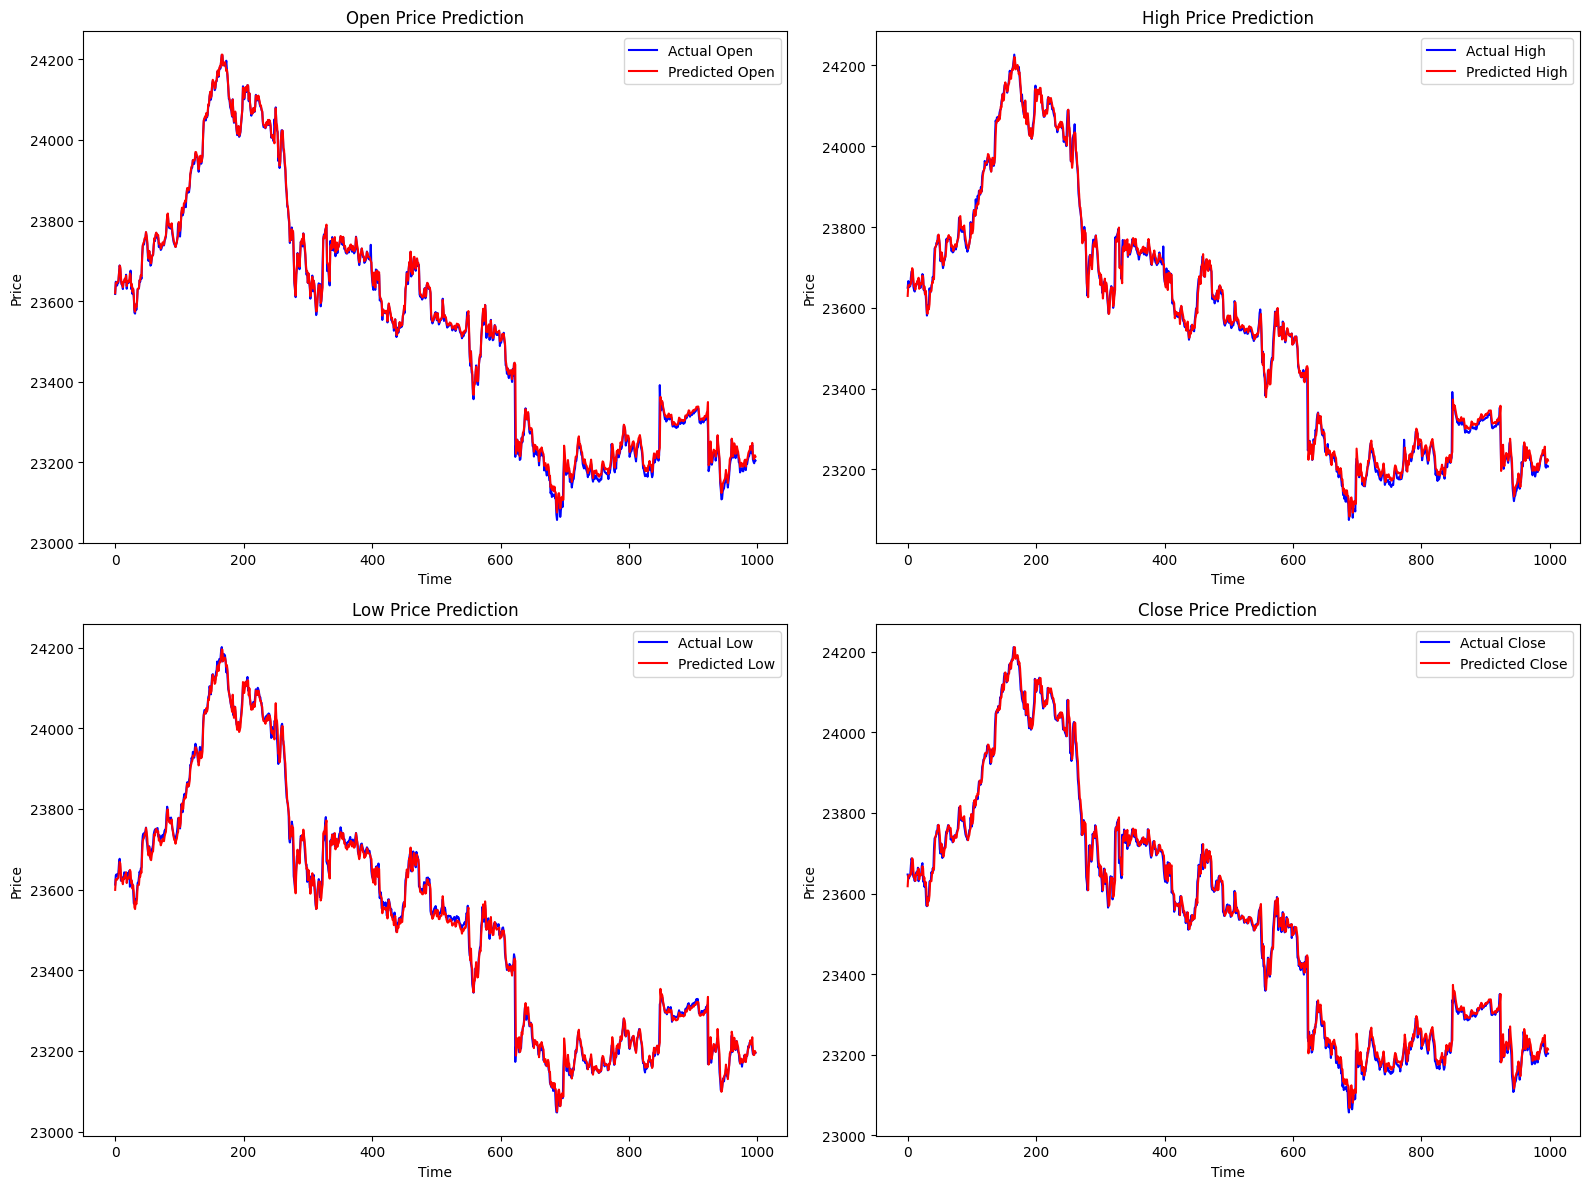

In [ ]:
import matplotlib.pyplot as plt

ohlc_labels = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(16, 12))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test_rescaled[:, i], label=f'Actual {ohlc_labels[i]}', color='blue')
    plt.plot(predictions_rescaled[:, i], label=f'Predicted {ohlc_labels[i]}', color='red')
    plt.title(f'{ohlc_labels[i]} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()


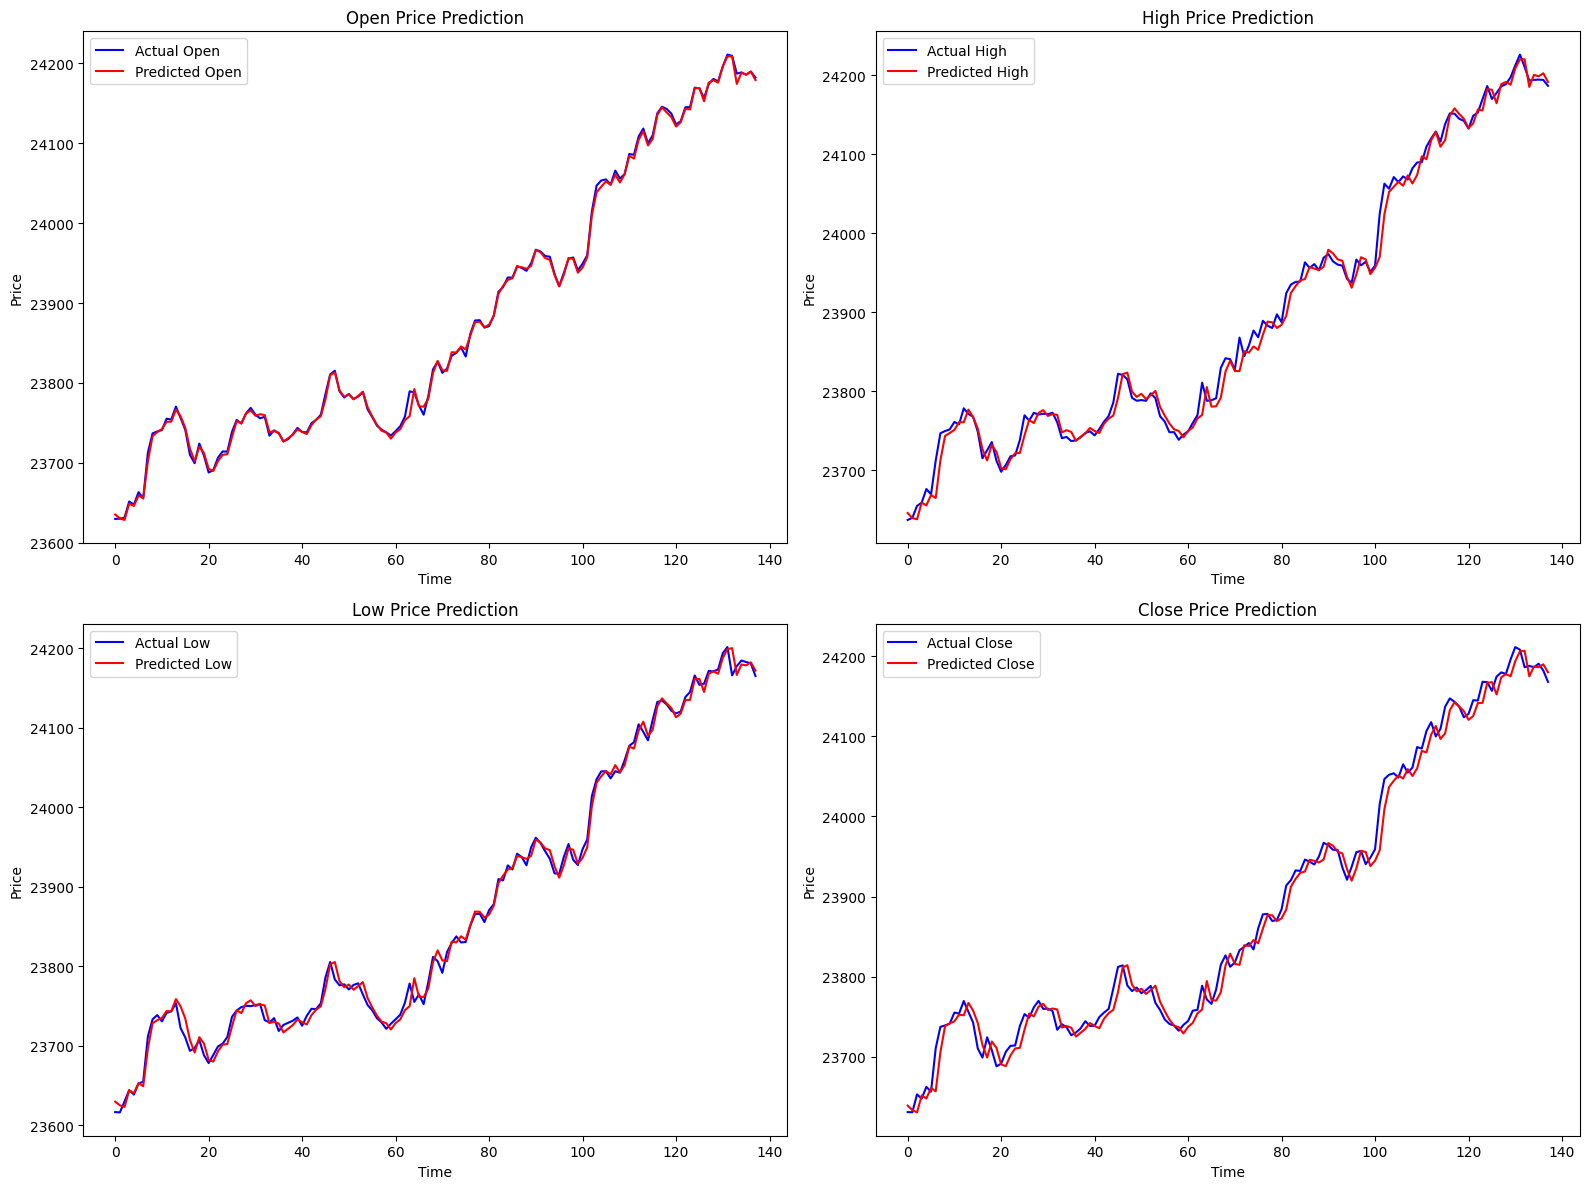

In [ ]:
import matplotlib.pyplot as plt

ohlc_labels = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(16, 12))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(test_org[:, i], label=f'Actual {ohlc_labels[i]}', color='blue')
    plt.plot(test_pred_s[:, i], label=f'Predicted {ohlc_labels[i]}', color='red')
    plt.title(f'{ohlc_labels[i]} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()


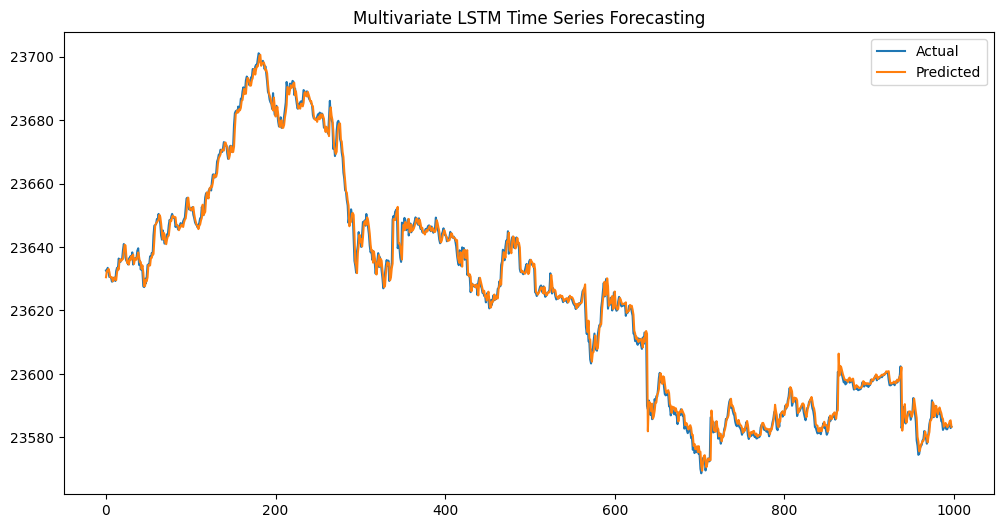

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title("Multivariate LSTM Time Series Forecasting")
plt.show()


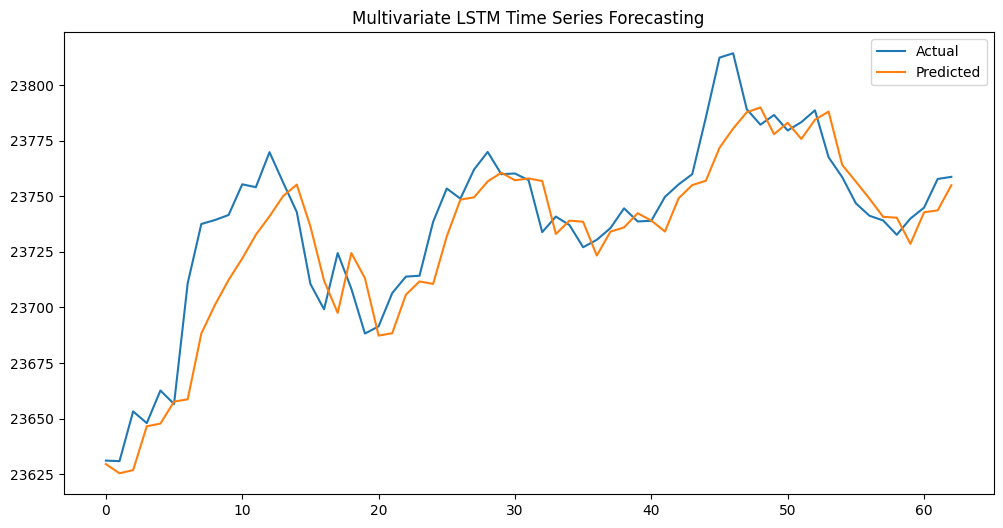

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_org, label='Actual')
plt.plot(test_pred_s, label='Predicted')
plt.legend()
plt.title("Multivariate LSTM Time Series Forecasting")
plt.show()
